<a href="https://colab.research.google.com/github/hibameo/-LangGraph_project/blob/main/LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langgraph-sdk langgraph-checkpoint-sqlite langsmith langchain-community langchain-core langchain-openai tavily-python wikipedia


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=846dbe4821d79dfa7718c31bf4de1ff3a59d4d595bff884ec53210d2563c75de
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [2]:
import os
from google.colab import userdata
from IPython.display import Image, display

In [3]:
from google import genai
from google.genai import types
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.retrievers import TavilySearchAPIRetriever

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:502: UserWarning: <built-in function any> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


In [4]:
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition


In [5]:
os.environ["gemini_api_key"] = userdata.get('GOOGLE_API_KEY_2')


# Utils Funtions

In [6]:
from google.generativeai import configure, GenerativeModel

def get_model(model: str = "gemini-1.5 flash", temp: float = 0.1, max_tokens: int = 100):
    """Get model from Google Gemini API"""

    configure(api_key="gemini_api_key")

    model = GenerativeModel(
        model_name=model,
        generation_config={
            "temperature": temp,
            "max_output_tokens": max_tokens
        }
    )

    return model


# Tools

In [7]:
def sum(a:float, b:float) -> float:
  """Sum a and b

  Args:
    a: first number
    b: second number"""
  return a+b

def minus(a:float, b:float) -> float:
  """Minus a and b

  Args:
    a: first number
    b: second number"""
  return a-b

def multiply(a:float, b:float) -> float:
  """Multiply a and b

  Args:
    a: first number
    b: second number"""
  return a*b

def divide(a:float, b:float) -> float:
  """Divide a and b
  Args:
    a: first number
    b: second number"""
  return a/b if b != 0 else "We cannot divide by zero"

In [8]:
# System Message
sys_msg = SystemMessage(content="You are a helpful mathematical assistant, tasked with performing arithmetic in order on a set of inputs.")

def assistant(state: MessagesState):
  return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

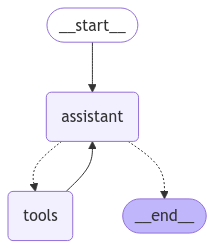

In [9]:
# Build Graph

builder = StateGraph(MessagesState)
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode([sum, minus, multiply, divide]))

builder.add_edge(START, "assistant")
builder.add_conditional_edges("assistant", tools_condition) # If latest message is a tool Call -> routes Tool else routes END
builder.add_edge("tools", "assistant")

graph = builder.compile()

#View graph
display(Image(graph.get_graph().draw_mermaid_png()))


# Build Agent and test

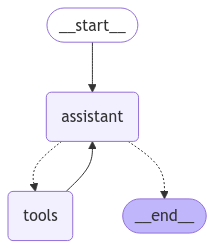

In [10]:
# Build Graph

builder = StateGraph(MessagesState)
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode([sum, minus, multiply, divide]))

builder.add_edge(START, "assistant")
builder.add_conditional_edges("assistant", tools_condition) # If latest message is a tool Call -> routes Tool else routes END
builder.add_edge("tools", "assistant")

graph = builder.compile()

#View graph
display(Image(graph.get_graph().draw_mermaid_png()))